# Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
import warnings

import scipy
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

np.random.seed(123)

belize_model = pd.read_csv('Belize Final Model.csv', index_col='Unnamed: 0')
belize_model['ID'] = belize_model['ID'].astype(str)  + '_B'

solomon_model = pd.read_csv('Solomon Final Model.csv', index_col='Unnamed: 0')
solomon_model['ID'] = solomon_model['ID'].astype(str)  + '_S'

vanuatu_model = pd.read_csv('Vanuatu Final Model.csv', index_col='Unnamed: 0')
vanuatu_model['ID'] = vanuatu_model['ID'].astype(str)  + '_V'

# Modeling

In [2]:
model_df = pd.concat([belize_model, solomon_model, vanuatu_model])
model_df = model_df.fillna(0)
print(model_df.shape)
model_df.head()

(657, 37)


,ID,Non_combust_wt_%,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Total_weight_(kg),aluminium_cans,aluminium_recyclable,batteries,bottles_cds,bottles_wine_and_spirits,cardboard,ceramics,drinkbags,electrical_items_and_peripherals_(incl_tvs),energy_kWh_per_kg,eps,feminine_hygiene,flexibles_film,food,hdpe_bottles,jars,lpb,nappies,other,other_glass,other_metal,other_organics,other_plastic,other_sanitary_waste,paper,pet_bottles,plastic_bags,pp,steel_cans,textiles,total_energy_kWh
0,1_B,0.000000,0.235955,0.359551,0.404494,0.534,0.000,0.000,0.0,0.0,0.0,0.192,0.0,0.0000,0.0,1.30,0.010,0.126,0.066,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.000,0.067,0.000,0.000,0.030,0.026,0.017,0.000,0.000,0.69
1,2_B,0.062102,0.738022,0.016245,0.183632,4.863,0.013,0.029,0.0,0.0,0.0,0.000,0.0,0.0115,0.0,2.76,0.003,0.000,0.196,2.989,0.203,0.26,0.009,0.063,0.0,0.0,0.0,0.537,0.188,0.000,0.070,0.147,0.058,0.075,0.000,0.000,13.42
2,3_B,0.020291,0.894826,0.016571,0.068312,2.957,0.000,0.013,0.0,0.0,0.0,0.000,0.0,0.0000,0.0,3.03,0.035,0.000,0.012,1.927,0.057,0.00,0.000,0.000,0.0,0.0,0.0,0.000,0.023,0.719,0.031,0.000,0.075,0.000,0.047,0.018,8.96
3,4_B,0.238462,0.407692,0.094872,0.258974,0.390,0.000,0.000,0.0,0.0,0.0,0.037,0.0,0.0050,0.0,1.72,0.003,0.000,0.028,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.159,0.000,0.000,0.065,0.000,0.093,0.000,0.67
4,5_B,0.000000,0.896653,0.027299,0.076048,3.077,0.000,0.000,0.0,0.0,0.0,0.047,0.0,0.0180,0.0,3.09,0.000,0.071,0.106,2.366,0.000,0.00,0.037,0.000,0.0,0.0,0.0,0.000,0.000,0.322,0.000,0.000,0.068,0.024,0.000,0.000,9.51


## Remove Outliers

In [3]:
model_df.describe()

,Non_combust_wt_%,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Total_weight_(kg),aluminium_cans,aluminium_recyclable,batteries,bottles_cds,bottles_wine_and_spirits,cardboard,ceramics,drinkbags,electrical_items_and_peripherals_(incl_tvs),energy_kWh_per_kg,eps,feminine_hygiene,flexibles_film,food,hdpe_bottles,jars,lpb,nappies,other,other_glass,other_metal,other_organics,other_plastic,other_sanitary_waste,paper,pet_bottles,plastic_bags,pp,steel_cans,textiles,total_energy_kWh
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,0.164221,0.562368,0.097642,0.174883,7.039078,0.278236,0.027437,0.003476,0.025985,0.026689,0.187169,0.009470,0.005390,0.006925,2.037534,0.024411,0.044382,0.215837,2.083743,0.031814,0.098312,0.035486,1.002744,0.079878,0.002893,0.026321,1.572169,0.106202,0.073056,0.118170,0.227420,0.175761,0.017618,0.346152,0.184600,16.829696
std,0.212095,0.328298,0.142824,0.184810,7.905361,0.903705,0.134408,0.027986,0.187057,0.198246,0.449210,0.074386,0.033875,0.065450,1.064171,0.061599,0.171813,0.342665,3.639778,0.085608,0.329199,0.135543,3.389378,0.338525,0.033120,0.201365,4.954004,0.301088,0.315111,0.258696,0.481947,0.486143,0.096537,0.737697,0.812959,22.966856
min,0.000000,0.000000,0.000000,0.000000,0.056000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018805,0.283636,0.002865,0.045108,2.161000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.710000
50%,0.077644,0.628221,0.044877,0.116012,4.552000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.480000,0.000000,0.000000,0.096000,0.562000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018000,0.000000,0.004000,0.088000,0.048000,0.000000,0.078000,0.000000,9.270000
75%,0.219512,0.854651,0.118399,0.232143,8.460000,0.084000,0.006000,0.000000,0.000000,0.000000,0.159000,0.000000,0.000000,0.000000,2.940000,0.014000,0.000000,0.252000,2.754000,0.018000,0.000000,0.011000,0.000000,0.000000,0.000000,0.000000,0.338000,0.096000,0.000000,0.115000,0.236000,0.168000,0.004000,0.343000,0.028000,20.450000
max,0.998243,1.000000,0.899387,1.000000,59.815000,8.612000,1.840000,0.356000,3.670000,2.873000,4.242000,1.122000,0.509000,0.862000,3.120000,0.574000,1.580000,3.228000,29.239000,0.912000,5.362000,1.860000,36.750000,4.494000,0.616000,4.306000,56.020000,4.904000,3.280000,2.408000,6.804000,6.048000,2.008000,6.452000,15.806000,175.410000


### Total Weight (kg)

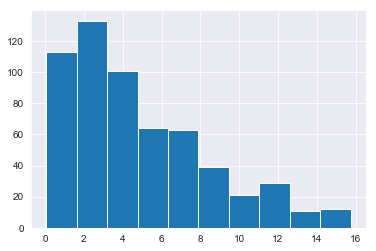

In [4]:
model_df[model_df['Total_weight_(kg)'] < 16]['Total_weight_(kg)'].hist();

In [5]:
print('Old length:', len(model_df))
print('New length:', len(model_df[model_df['total_energy_kWh'] > 0]))
model_df = model_df[model_df['total_energy_kWh'] > 0]
model_df.describe()

Old length: 657
New length: 586


,Non_combust_wt_%,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Total_weight_(kg),aluminium_cans,aluminium_recyclable,batteries,bottles_cds,bottles_wine_and_spirits,cardboard,ceramics,drinkbags,electrical_items_and_peripherals_(incl_tvs),energy_kWh_per_kg,eps,feminine_hygiene,flexibles_film,food,hdpe_bottles,jars,lpb,nappies,other,other_glass,other_metal,other_organics,other_plastic,other_sanitary_waste,paper,pet_bottles,plastic_bags,pp,steel_cans,textiles,total_energy_kWh
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.00000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.134367,0.630505,0.087085,0.147051,7.618173,0.25152,0.029147,0.003898,0.026519,0.020462,0.194246,0.007824,0.005555,0.007166,2.284403,0.026384,0.049759,0.222308,2.336210,0.033171,0.101196,0.038166,1.124237,0.085688,0.003022,0.029156,1.762654,0.113937,0.081908,0.126618,0.226881,0.175517,0.019394,0.321509,0.192631,18.868788
std,0.169104,0.278974,0.122657,0.144996,8.125326,0.85164,0.140723,0.029608,0.189857,0.160275,0.457601,0.070767,0.034206,0.068399,0.839638,0.064155,0.181202,0.350437,3.776908,0.087942,0.335554,0.142816,3.570059,0.356283,0.034662,0.212890,5.213870,0.316792,0.332596,0.266703,0.484771,0.448975,0.102026,0.691295,0.841872,23.514974
min,0.000000,0.003579,0.000000,0.000000,0.056000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000
25%,0.017861,0.419896,0.003361,0.039520,2.529000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.742500,0.000000,0.000000,0.036000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.755000
50%,0.068807,0.685711,0.042050,0.103559,4.906000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.620000,0.000000,0.000000,0.101000,0.791000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.010000,0.088000,0.053500,0.000000,0.078000,0.000000,11.000000
75%,0.181555,0.871793,0.110851,0.204231,9.231000,0.08000,0.007000,0.000000,0.000000,0.000000,0.175500,0.000000,0.000000,0.000000,2.970000,0.024000,0.000000,0.258000,3.067500,0.020750,0.000000,0.012000,0.057250,0.000000,0.000000,0.000000,0.663000,0.100000,0.000000,0.130000,0.232000,0.179000,0.005000,0.304750,0.033750,22.677500
max,0.926819,1.000000,0.823762,0.860902,59.815000,8.61200,1.840000,0.356000,3.670000,2.873000,4.242000,1.122000,0.509000,0.862000,3.120000,0.574000,1.580000,3.228000,29.239000,0.912000,5.362000,1.860000,36.750000,4.494000,0.616000,4.306000,56.020000,4.904000,3.280000,2.408000,6.804000,5.256000,2.008000,6.452000,15.806000,175.410000


### Total Energy kWh

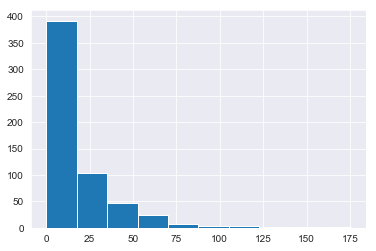

In [6]:
model_df[model_df['total_energy_kWh'] > 0]['total_energy_kWh'].hist();

In [7]:
print('Old length:', len(model_df))
print('New length:', len(model_df[model_df['Total_weight_(kg)'] < 16]))
model_df = model_df[model_df['Total_weight_(kg)'] < 16]
model_df.describe()

Old length: 586
New length: 516


,Non_combust_wt_%,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Total_weight_(kg),aluminium_cans,aluminium_recyclable,batteries,bottles_cds,bottles_wine_and_spirits,cardboard,ceramics,drinkbags,electrical_items_and_peripherals_(incl_tvs),energy_kWh_per_kg,eps,feminine_hygiene,flexibles_film,food,hdpe_bottles,jars,lpb,nappies,other,other_glass,other_metal,other_organics,other_plastic,other_sanitary_waste,paper,pet_bottles,plastic_bags,pp,steel_cans,textiles,total_energy_kWh
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,0.141575,0.610547,0.090113,0.156637,5.223431,0.199983,0.024217,0.002147,0.030116,0.023238,0.147915,0.005998,0.006309,0.004107,2.227578,0.026977,0.056083,0.179067,1.701150,0.034548,0.091444,0.032537,0.651723,0.062072,0.003432,0.019728,0.896434,0.091599,0.091713,0.112634,0.181076,0.140967,0.015632,0.273866,0.115027,12.109748
std,0.173728,0.283029,0.126608,0.149067,3.635338,0.756555,0.104719,0.022486,0.202081,0.170631,0.331126,0.065309,0.036391,0.049133,0.859181,0.063719,0.192178,0.288849,2.294945,0.083585,0.246646,0.138367,1.984713,0.240087,0.036923,0.114199,2.250055,0.274567,0.352108,0.227172,0.328292,0.382436,0.060521,0.586254,0.414171,10.445627
min,0.000000,0.003579,0.000000,0.000000,0.056000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000
25%,0.019392,0.395613,0.003385,0.044443,2.246500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.645000,0.000000,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.145000
50%,0.076120,0.667773,0.043399,0.116282,4.318000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.088000,0.721500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016500,0.000000,0.012000,0.081000,0.052000,0.000000,0.069000,0.000000,9.270000
75%,0.194802,0.861856,0.113435,0.217723,7.429000,0.070500,0.009000,0.000000,0.000000,0.000000,0.150250,0.000000,0.000000,0.000000,2.940000,0.026000,0.000000,0.226500,2.603000,0.027250,0.000000,0.009000,0.000000,0.000000,0.000000,0.000000,0.340750,0.089500,0.000000,0.114250,0.211250,0.160000,0.005000,0.241000,0.020250,16.872500
max,0.926819,1.000000,0.823762,0.860902,15.750000,8.612000,1.840000,0.356000,3.670000,2.873000,2.825000,1.122000,0.509000,0.838000,3.120000,0.574000,1.580000,3.228000,11.976000,0.848000,2.306000,1.860000,15.092000,2.780000,0.616000,1.300000,15.232000,4.904000,3.280000,1.896000,3.338000,5.256000,0.970000,5.308000,4.376000,48.840000


In [8]:
# print('Old length:', len(model_df))
# print('New length:', len(model_df[model_df['total_energy_kWh'] < 150]))
# model_df = model_df[model_df['total_energy_kWh'] < 150]
# model_df.describe()

## Remove Unnecessary Features

In [9]:
X = model_df.drop(['ID',
                   'total_energy_kWh',
                   'energy_kWh_per_kg',
                   'Total_weight_(kg)',
                   'Organics_wt_%',
                   'Paper_and_cardboard_wt_%',
                   'Plastics_wt_%',
                   'Non_combust_wt_%'],
                   axis=1)
y = model_df[['total_energy_kWh']]

In [10]:
# X = model_df.drop(['ID',
#                    'total_energy_kWh',
#                    'energy_kWh_per_kg',
#                    'Total_weight (kg)',
#                    'Organics_wt_%',
#                    'Paper_and_cardboard_wt_%',
#                    'Plastics_wt_%',
#                    'Non_combust_wt_%'], axis=1)
# y = model_df[['energy_kWh_per_kg']]

## Train/Test Split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape)
print(X_test.shape)

(438, 29)
(78, 29)


In [12]:
scaler = StandardScaler()
X_train_Scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_Scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

y_train_Scaled = scaler.fit_transform(y_train)
y_test_Scaled = scaler.transform(y_test)

In [13]:
X_train_Scaled.head()

,aluminium_cans,aluminium_recyclable,batteries,bottles_cds,bottles_wine_and_spirits,cardboard,ceramics,drinkbags,electrical_items_and_peripherals_(incl_tvs),eps,feminine_hygiene,flexibles_film,food,hdpe_bottles,jars,lpb,nappies,other,other_glass,other_metal,other_organics,other_plastic,other_sanitary_waste,paper,pet_bottles,plastic_bags,pp,steel_cans,textiles
0,-0.270417,-0.228289,-0.103834,-0.14073,-0.136738,1.265438,-0.098466,-0.154106,-0.079706,-0.413417,-0.30746,5.950470,-0.611218,-0.412176,0.861347,-0.170126,-0.332314,0.959775,-0.090284,-0.16923,-0.229082,2.599808,-0.266459,2.736695,0.034459,-0.321770,-0.263237,0.178715,0.629460
1,-0.270417,-0.228289,-0.103834,-0.14073,-0.136738,-0.445976,-0.098466,-0.154106,-0.079706,0.294467,-0.30746,0.281862,0.121999,-0.005058,-0.379311,-0.105424,-0.332314,0.122243,-0.090284,-0.16923,-0.398419,-0.332371,3.751712,-0.182397,2.210006,-0.049377,0.106801,-0.472867,-0.276395
2,-0.270417,-0.228289,-0.103834,-0.14073,-0.136738,-0.215897,-0.098466,-0.154106,-0.079706,4.636151,-0.30746,-0.367938,1.107798,3.635061,-0.379311,-0.234828,-0.332314,-0.260629,-0.090284,-0.16923,-0.398419,0.074405,3.968911,-0.490546,-0.251950,-0.083733,0.338075,-0.472867,-0.190893
3,-0.235729,-0.228289,-0.103834,-0.14073,-0.136738,-0.445976,-0.098466,-0.154106,-0.079706,-0.413417,-0.30746,0.402679,-0.734281,-0.412176,-0.379311,-0.234828,-0.332314,-0.260629,-0.090284,-0.16923,6.707200,-0.128983,-0.266459,-0.490546,-0.538359,-0.164715,-0.263237,-0.472867,-0.276395
4,-0.270417,-0.228289,-0.103834,-0.14073,-0.136738,-0.124495,-0.098466,-0.154106,-0.079706,-0.413417,-0.30746,-0.191611,-0.310444,0.186528,0.759267,0.160573,-0.332314,5.546261,-0.090284,-0.16923,-0.373695,0.098134,-0.266459,0.317305,-0.448675,-0.351218,-0.263237,-0.375466,-0.174717


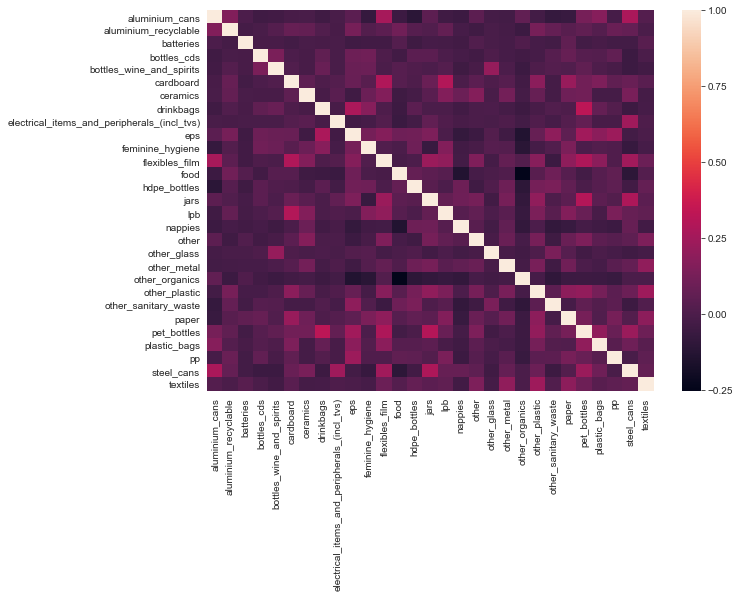

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(X_train_Scaled.corr());

## Statsmodel OLS

In [15]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

X_int = sm.tools.add_constant(X)
model = OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_energy_kWh   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2096.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:48:46   Log-Likelihood:                -694.44
No. Observations:                 516   AIC:                             1449.
Df Residuals:                     486   BIC:                             1576.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.0901      0.080     -1.128      0.260      -0.247       0.067
aluminium_cans                                 -0.0238      0.063     -0.380      0.704      -0.147       0.099
aluminium_recyclable                            0.0748      0.423      0.177      0.860      -0.755       0.905
batteries                                      -7.7792      1.891     -4.113      0.000     -11.496      -4.063
bottles_cds                                    -0.1660      0.214     -0.776      0.438      -0.586       0.254
bottles_wine_and_spirits                       -0.1591      0.252     -0.631      0.528      -0.654       0.336
cardboard                                       1.3185      0.140      9.425      0.000       1.044       1.593
ceramics                                       -0.2133      0.685     -0.311      0.756      -1.560       1.133
drinkbags                                       0.5455      1.301      0.419      0.675      -2.010       3.101
electrical_items_and_peripherals_(incl_tvs)    -0.9696      0.889     -1.091      0.276      -2.716       0.776
eps                                             1.8900      0.783      2.415      0.016       0.352       3.428
feminine_hygiene                                3.6907      0.235     15.696      0.000       3.229       4.153
flexibles_film                                  0.8802      0.174      5.057      0.000       0.538       1.222
food                                            3.3253      0.020    169.311      0.000       3.287       3.364
hdpe_bottles                                    2.8406      0.530      5.359      0.000       1.799       3.882
jars                                           -0.3421      0.193     -1.773      0.077      -0.721       0.037
lpb                                             1.0103      0.337      3.001      0.003       0.349       1.672
nappies                                         3.2646      0.022    147.493      0.000       3.221       3.308
other                                          -0.2740      0.185     -1.484      0.139      -0.637       0.089
other_glass                                    -0.6256      1.161     -0.539      0.590      -2.907       1.656
other_metal                                     0.0077      0.391      0.020      0.984      -0.761       0.777
other_organics                                  3.2458      0.020    162.403      0.000       3.207       3.285
other_plastic                                   0.9958      0.170      5.862      0.000       0.662       1.330
other_sanitary_waste                            3.6716      0.127     28.987      0.000       3.423       3.920
paper                                           1.4035     

In [16]:
# from statsmodels.regression.linear_model import OLS
# import statsmodels.api as sm
# import statsmodels.stats.api as sms
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# plt.style.use('ggplot')

# X_int = sm.tools.add_constant(X)
# model = OLS(y, X_int).fit()
# model.summary()

In [17]:
#
# results = []
# print('Model Residuals Plot')
# print('--------------------')
# fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
# plt.show()
# for idx, column in enumerate(X.columns):
#     print(f'Belize MSW Regression Plot for {column} Feature')
#     print('------------------------------------------------')
    
#     fig, axes = plt.subplots(figsize=(15,12))
#     fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
#     fig.tight_layout()
#     plt.show()
    
#     input('Press ENTER to continue...')

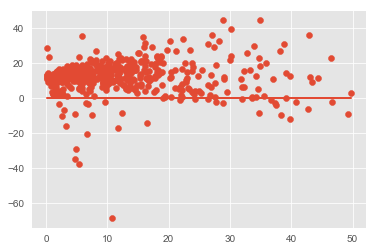

In [18]:
# Plot redisuals from Statsmodel OLS
plt.scatter(model.predict(X_int), scaler.inverse_transform(model.resid))
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))]);

In [19]:
model.predict(X_int)

0       0.826514
1      12.984664
2       9.313686
3       0.595986
4       9.496008
5      16.847785
6      11.513271
7       5.995017
8       2.935031
9      11.317503
10      1.085964
12      5.439744
13      3.228693
14     13.701900
15      6.595444
16     14.290378
17      5.528725
18     24.312654
19     13.088233
20     22.654283
21      2.416647
22      4.792566
23      1.936755
24     18.299601
25      2.508644
26      1.682131
27      5.159748
28      6.442032
29      4.093297
30      9.692694
31      8.929825
32      9.360254
33     16.835963
34      0.897732
35     11.835366
36      2.620750
37      7.217516
38     23.802051
39     10.262615
40      7.409380
41     13.221055
42     18.055667
43      2.388848
44      5.794616
45      4.414023
46      9.074750
47      9.848725
48     32.222538
49      3.824385
50     17.775287
51     23.556205
52     30.081862
53     17.755210
54      5.843692
55      9.956095
56      9.826669
57      5.901992
58     28.145943
59     11.1453

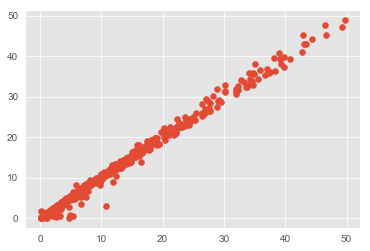

In [20]:
plt.scatter(model.predict(X_int), y)

In [21]:
model.resid.mean()

-9.955860425475823e-15

## Scikit Learn LinearRegression Model

In [22]:
from sklearn.linear_model import LinearRegression, LassoCV
linreg = LinearRegression()
linreg.fit(X_train_Scaled, y_train_Scaled)

y_hat_train_scaled = linreg.predict(X_train_Scaled)
y_hat_test_scaled = linreg.predict(X_test_Scaled)

train_residuals = scaler.inverse_transform(y_hat_train_scaled) - y_train
test_residuals = scaler.inverse_transform(y_hat_test_scaled) - y_test

train_mse = mean_squared_error(y_train, scaler.inverse_transform(y_hat_train_scaled))
test_mse = mean_squared_error(y_test, scaler.inverse_transform(y_hat_test_scaled))

print('Train RMSE:', np.sqrt(train_mse))
print('------------------------------')
print('Test RMSE:', np.sqrt(test_mse))
linreg.score(X_test_Scaled, y_test_Scaled)

Train RMSE: 0.9516489799695513
------------------------------
Test RMSE: 0.8361236990107691


0.9946853016254273

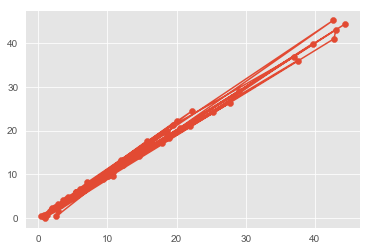

In [23]:
plt.scatter(scaler.inverse_transform(y_hat_test_scaled), y_test)
plt.plot(scaler.inverse_transform(y_hat_test_scaled), y_test);

Sklearn Model Intercept: [1.74102674e-16]


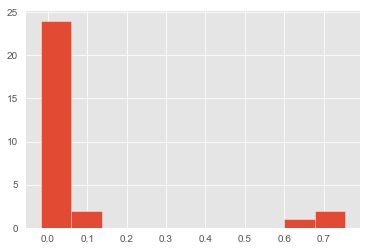

In [24]:
sklearn_results = pd.DataFrame()
sklearn_results['Item'] = [x for x in X_train_Scaled.columns]
sklearn_results['Coef'] = [x for x in linreg.coef_[0]]
print('Sklearn Model Intercept:', linreg.intercept_)
sklearn_results['Coef'].hist();

## Decision Tree Regressor

### Baseline Model

In [25]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_Scaled, y_train_Scaled)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [26]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test_Scaled)
y_pred = scaler.inverse_transform(y_pred)

print('RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-sq Score:', r2_score(y_test, y_pred))

RMSE Score: 3.7385908492989097
R-sq Score: 0.8937440073412928


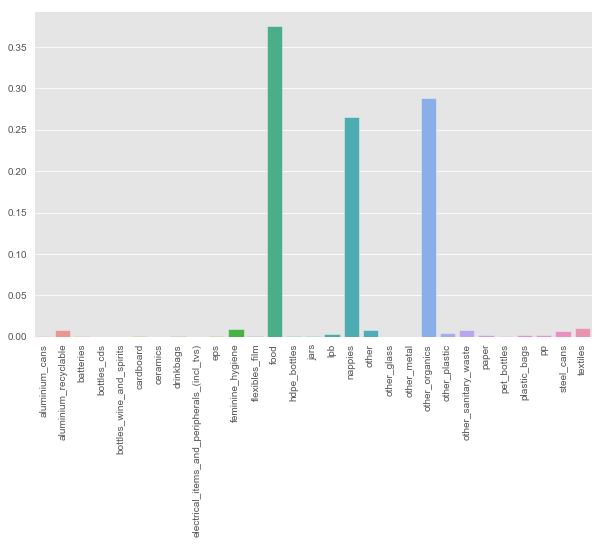

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(X_train_Scaled.columns, regressor.feature_importances_, orient="v");
plt.xticks(rotation=90);

### Optimized Model

In [28]:
op_regressor = DecisionTreeRegressor(random_state=42,
                                     max_depth=4,
                                     min_samples_leaf=2,
                                     min_samples_split=4)
op_regressor.fit(X_train_Scaled, y_train_Scaled)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [29]:
y_pred = op_regressor.predict(X_test_Scaled)
y_pred = scaler.inverse_transform(y_pred)

print('RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-sq Score:', r2_score(y_test, y_pred))

RMSE Score: 5.266603000466135
R-sq Score: 0.7891378064597618


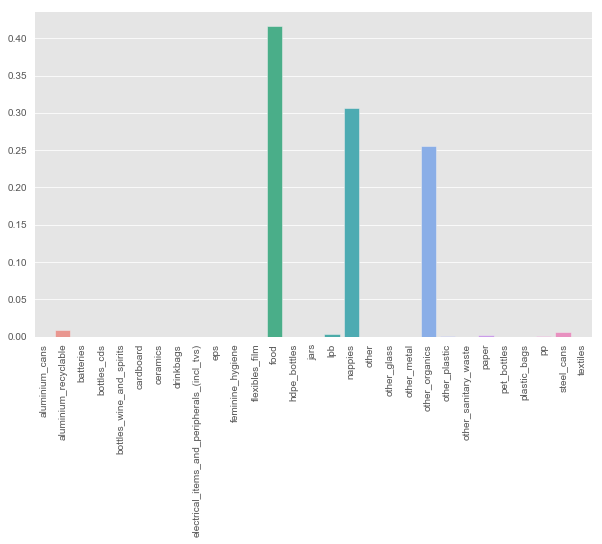

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(X_train_Scaled.columns, op_regressor.feature_importances_, orient="v");
plt.xticks(rotation=90);

## Random Forest Model

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import pydotplus
from sklearn.pipeline import Pipeline

### Baseline Model

In [32]:
rdm_forest = RandomForestRegressor(200, random_state=42)

In [33]:
rdm_forest.fit(X_train_Scaled, y_train_Scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [34]:
rdm_forest.score(X_train_Scaled, y_train_Scaled)

0.9904453325177128

In [35]:
rdm_forest.score(X_test_Scaled, y_test_Scaled)

0.9312683078559036

In [36]:
y_preds = rdm_forest.predict(X_test_Scaled)
y_preds

array([-7.45326316e-02, -9.60877738e-01,  1.54923452e-01, -7.29864050e-01,
       -8.85565870e-01, -7.46943985e-01,  2.19273351e+00, -5.30998531e-01,
       -7.00298869e-01,  1.89367352e+00, -5.25275922e-01, -1.79559576e-02,
       -3.35526537e-01,  5.40574515e-01, -1.10056407e+00, -4.42166268e-01,
       -6.55958420e-01, -1.97690779e-01, -9.49559474e-01, -7.65903787e-01,
       -1.06912878e+00, -7.29539580e-04,  1.22881581e+00, -9.21244282e-01,
       -5.52512022e-01,  2.90823533e+00, -5.68179364e-02,  1.23047596e+00,
        3.86011853e-02, -9.05453398e-01, -8.86464300e-01, -1.13957253e+00,
        4.80365059e-01, -1.42720536e-01,  5.09261301e-01,  1.96445906e+00,
       -9.51722542e-01, -6.43194855e-01,  1.12536942e+00, -1.10349373e+00,
        2.99795284e-01,  3.67909947e-01, -1.04241514e+00, -1.40464696e-01,
       -6.50660613e-01, -4.17234836e-01,  2.53980239e-01, -6.30826795e-01,
        6.61730726e-01, -9.83597274e-01, -9.69071029e-01,  6.77526492e-01,
        2.54331798e-01,  

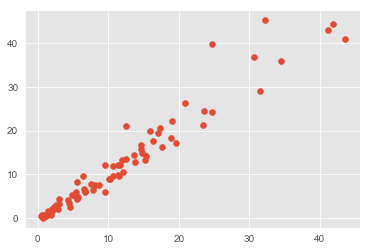

In [37]:
# Plot redisuals from Random Forest

plt.scatter(scaler.inverse_transform(rdm_forest.predict(X_test_Scaled)), y_test);
# plt.plot(scaler.inverse_transform(rdm_forest.predict(X_test_Scaled)), y_test);

In [38]:
np.sqrt(mean_squared_error(y_test, scaler.inverse_transform(y_preds)))

3.0068359930822433

### GridSearch

In [39]:
rf_grid_reg = RandomForestRegressor(random_state=42)
grid_param = [{'n_estimators': [150, 200, 250, 300],
               'max_depth': [13, 15, 17, 20],
               'min_samples_split': [2, 3, 4, 5],
               'min_samples_leaf': [1, 2, 3]}]

In [40]:
# rf_gridsearch = GridSearchCV(rf_grid_reg, grid_param, cv=3)
# rf_gridsearch.fit(X_train_Scaled, y_train_Scaled)

In [41]:
# rf_gridsearch.best_params_

In [42]:
# rf_gridsearch.score(X_test_Scaled, y_test_Scaled)

In [43]:
optimal_rf_model = RandomForestRegressor(max_depth=20,
                                         min_samples_leaf=1,
                                         min_samples_split=3,
                                         n_estimators=200,
                                         random_state=42)
optimal_rf_model.fit(X_train_Scaled, y_train_Scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [44]:
optimal_rf_model.score(X_train_Scaled, y_train_Scaled)

0.9893350212330665

In [45]:
optimal_rf_model.score(X_test_Scaled, y_test_Scaled)

0.9328774669395232

In [46]:
y_preds = optimal_rf_model.predict(X_test_Scaled)
y_preds

array([-0.06242396, -0.95984967,  0.14700184, -0.73092374, -0.87665485,
       -0.74703163,  2.18361451, -0.52458553, -0.70083812,  1.87780945,
       -0.52237018, -0.02154073, -0.33051589,  0.54684782, -1.09674266,
       -0.44502684, -0.64856471, -0.18101536, -0.94885813, -0.76953349,
       -1.06859822,  0.0095289 ,  1.22882094, -0.91411999, -0.54527958,
        2.90999288, -0.04395948,  1.25244556,  0.05033894, -0.9063808 ,
       -0.88414173, -1.13865653,  0.49496879, -0.15530303,  0.51274567,
        1.97986111, -0.9469593 , -0.64011594,  1.14689595, -1.10183845,
        0.28717176,  0.37323746, -1.04181094, -0.14158147, -0.63697095,
       -0.41740644,  0.26168487, -0.63960769,  0.64130219, -0.98430663,
       -0.96679038,  0.69175082,  0.26496271,  0.14858543, -0.07412289,
       -0.0389186 , -0.17617884,  0.86868221,  0.73283008,  1.08985531,
        1.82445248, -1.08264988, -0.3883538 ,  0.41793201, -0.53871098,
       -0.25562592, -1.00018174,  3.06989409,  2.81338635, -1.11

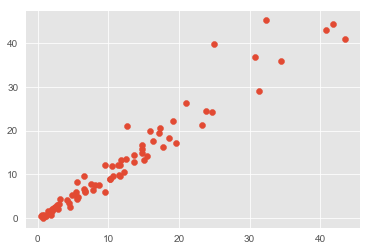

In [47]:
plt.scatter(scaler.inverse_transform(optimal_rf_model.predict(X_test_Scaled)), y_test);

In [48]:
np.sqrt(mean_squared_error(y_test, scaler.inverse_transform(y_preds)))

2.9714292281826133

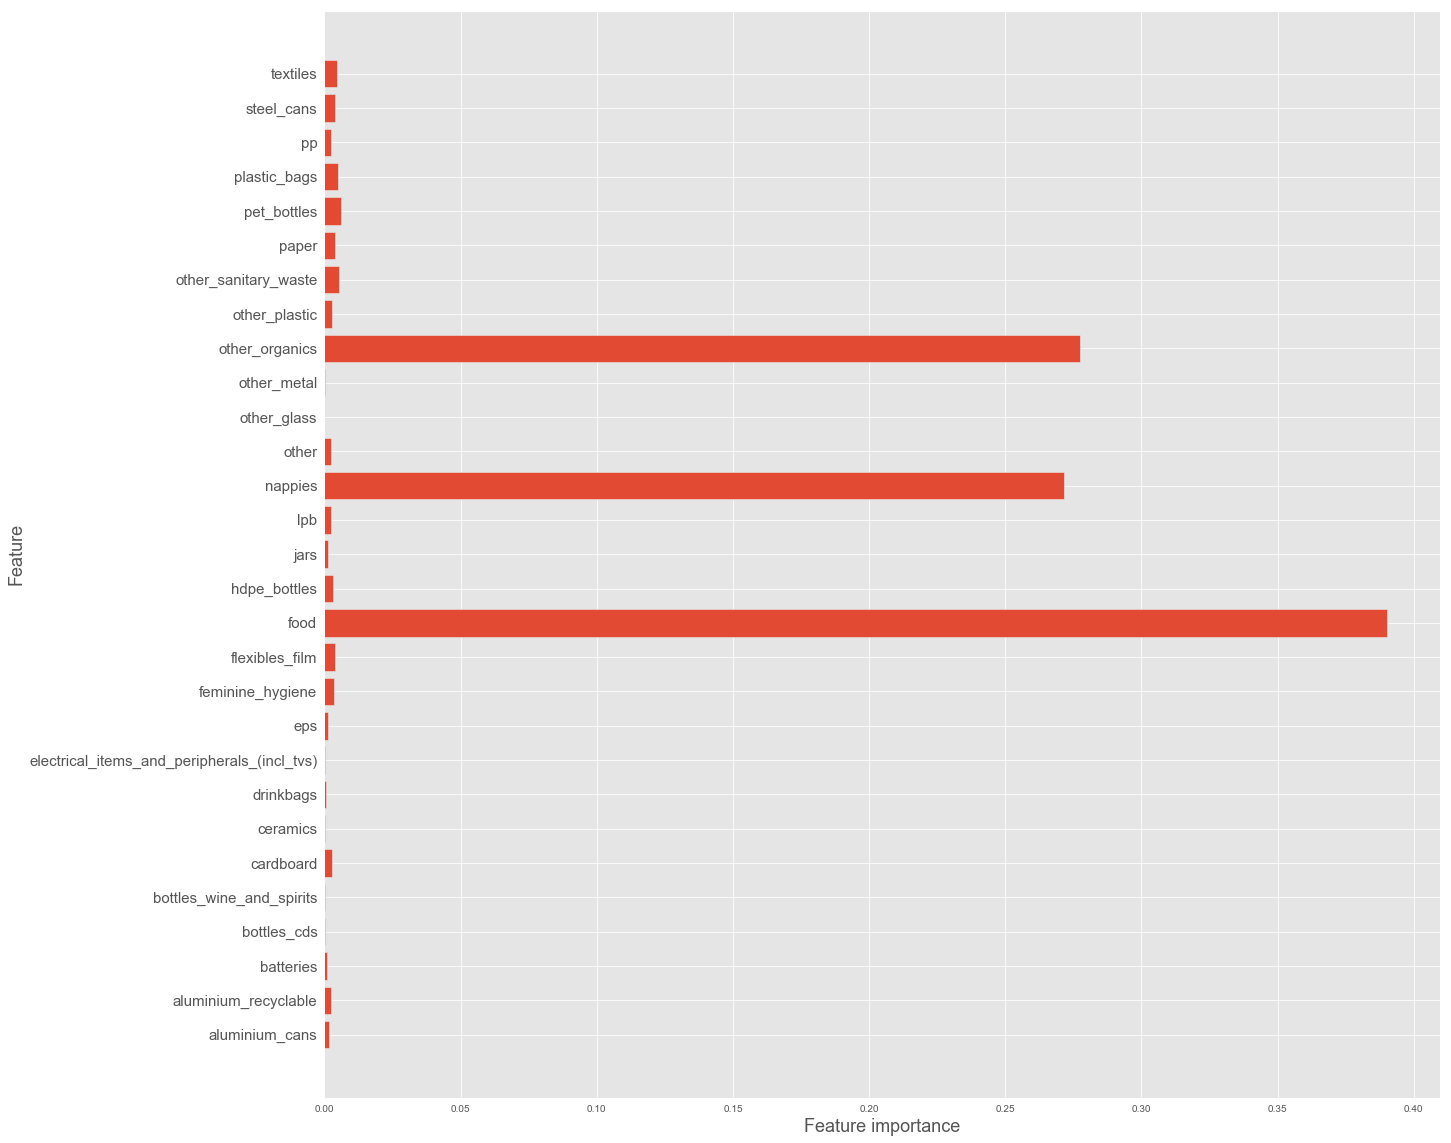

In [49]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance', fontsize=18)
    plt.yticks(fontsize=15)
    plt.ylabel('Feature', fontsize=18)
    plt.yticks(fontsize=15)

plot_feature_importances(optimal_rf_model)

## XG Boost

In [50]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train_Scaled, y_train_Scaled)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [51]:
xgb_reg.score(X_train_Scaled, y_train_Scaled)

0.9938883151193825

In [52]:
xgb_reg.score(X_test_Scaled, y_test_Scaled)

0.9467979553634431

In [53]:
training_preds = scaler.inverse_transform(xgb_reg.predict(X_train_Scaled))
test_preds = scaler.inverse_transform(xgb_reg.predict(X_test_Scaled))

In [54]:
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, training_preds)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, test_preds)))

Train RMSE: 0.8005419215692037
Test RMSE: 2.645424539619799


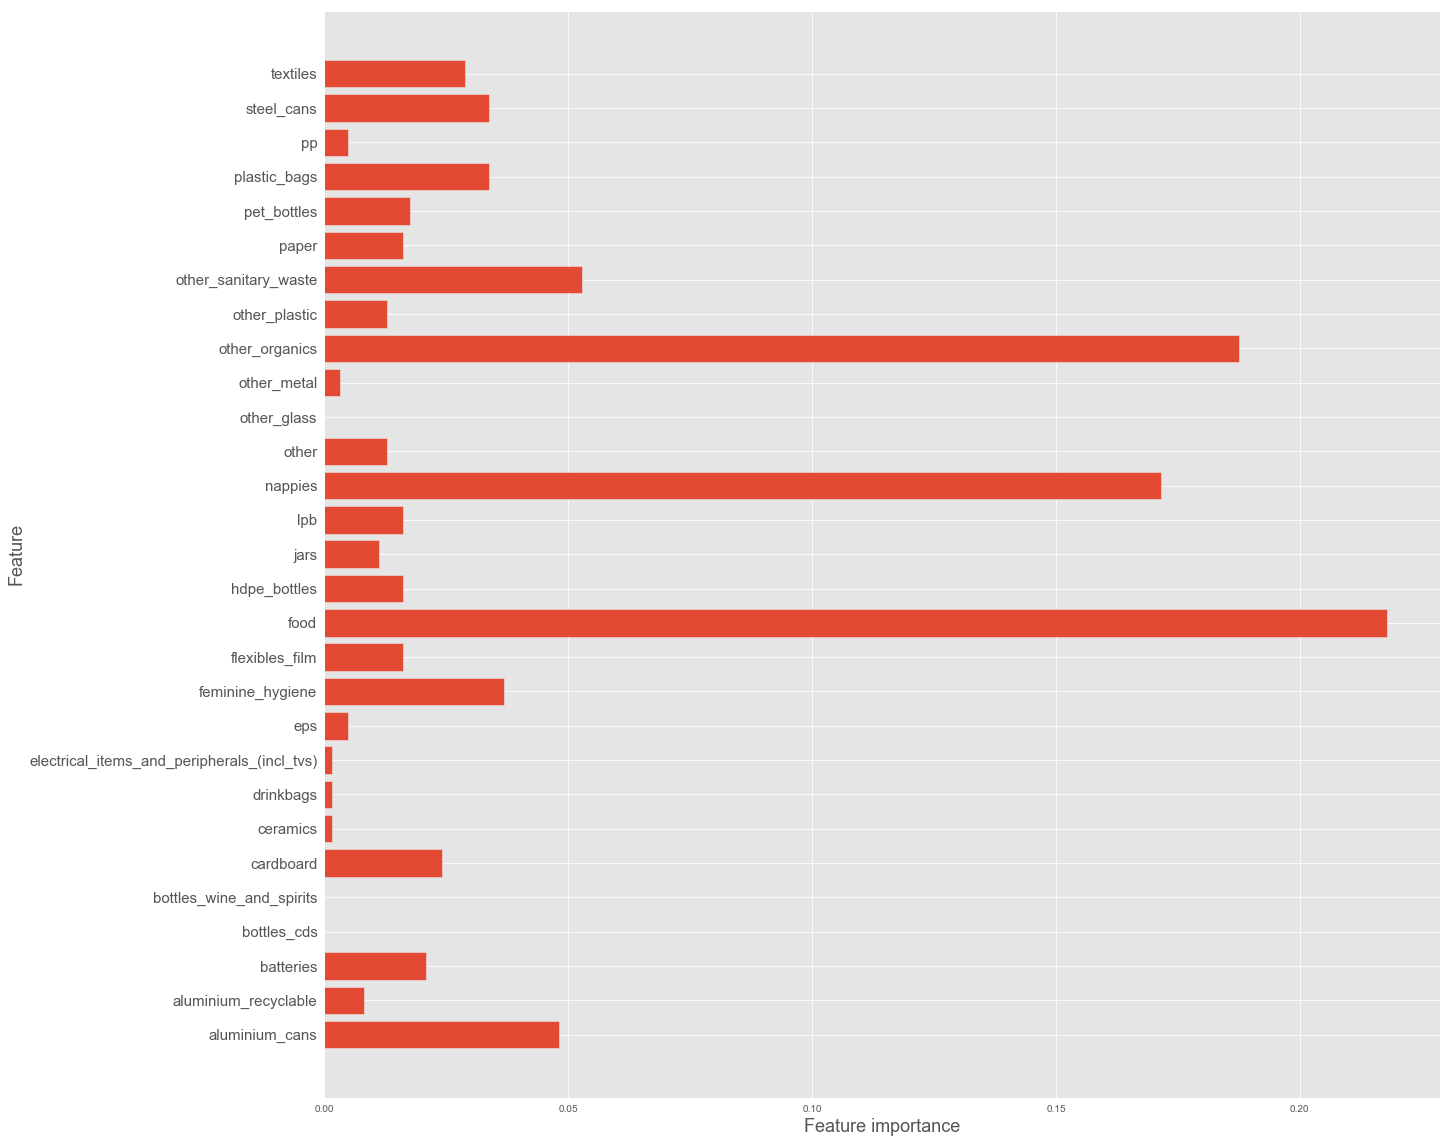

In [55]:
plot_feature_importances(xgb_reg)

### GridSearch

In [56]:
xgb_grid_model = xgb.XGBRegressor(random_state=42)

xgb_reg_grid_param = [{'max_depth': [5, 7, 10, 12],
               'learning_rate': [0.1, 0.2],
               'n_estimators': [100, 150, 200],
               'min_child_weight': [2, 3, 4],
               'max_delta_step': [0, 1]}]

In [57]:
xgbclf_gridsearch = GridSearchCV(xgb_grid_model,
                                 xgb_reg_grid_param,
                                 scoring='neg_mean_squared_error')
xgbclf_gridsearch.fit(X_train_Scaled, y_train_Scaled)

KeyboardInterrupt: 

In [ ]:
xgbclf_gridsearch.best_params_

In [58]:
xgb_grid_model = xgb.XGBRegressor(learning_rate = 0.1,
                                  max_delta_step = 1,
                                  max_depth = 5,
                                  min_child_weight = 3,
                                  n_estimators = 200,
                                  random_state=42)
xgb_grid_model.fit(X_train_Scaled, y_train_Scaled)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=1,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [59]:
xgb_grid_model.score(X_train_Scaled, y_train_Scaled)

0.9996621914402065

In [60]:
xgb_grid_model.score(X_test_Scaled, y_test_Scaled)

0.947040804841784

In [61]:
training_preds = scaler.inverse_transform(xgb_grid_model.predict(X_train_Scaled))
test_preds = scaler.inverse_transform(xgb_grid_model.predict(X_test_Scaled))

In [62]:
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, training_preds)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, test_preds)))

Train RMSE: 0.18820831030912136
Test RMSE: 2.639379992817984


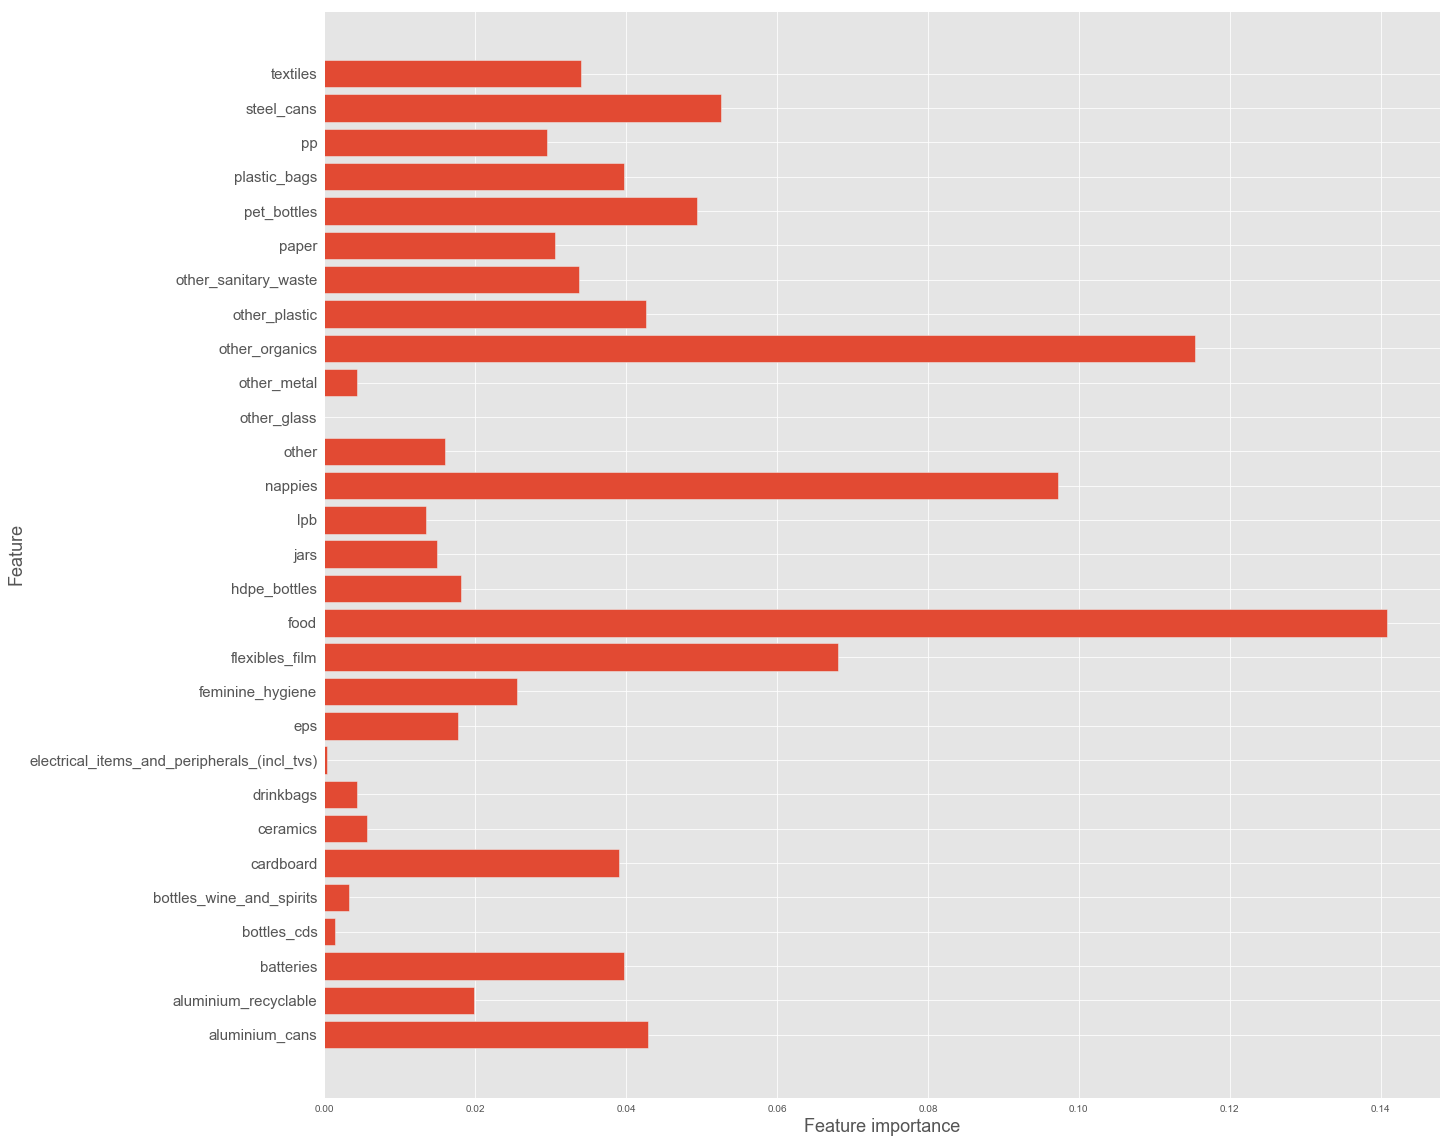

In [63]:
plot_feature_importances(xgb_grid_model)

## MLP Regression Model

In [64]:
from keras import layers, models, optimizers, regularizers
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor

In [65]:
n_features = X_train_Scaled.shape[1]

### Loss, MSE, & R^2 Visualization Function

In [66]:
def coef_determination(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [67]:
#Build vizualization function for training/validation loss and accuracy
def visualize_loss_MSE(results):
    history = results.history
    
    plt.plot(history['loss'], 'b', label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(history['mse'], 'b', label='Training MSE')
    plt.title('Training MSE')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(history['coef_determination'], 'b', label='Training R^2')
    plt.title('Training R^2')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('R^2', fontsize=12)
    plt.legend(loc='best')
    plt.show()

### Baseline Model

In [68]:
baseline_model = Sequential()

baseline_model.add(layers.Dense(10, activation='relu', input_shape=(n_features, )))

baseline_model.add(layers.Dense(5, activation='relu'))

baseline_model.add(layers.Dense(1, activation='linear'))

baseline_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [69]:
baseline_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
14/14 [==============================] - 0s 855us/step - loss: 1.5462 - mse: 1.5462 - coef_determination: -0.7075
Epoch 2/150
14/14 [==============================] - 0s 784us/step - loss: 1.2260 - mse: 1.2260 - coef_determination: -0.2850
Epoch 3/150
14/14 [==============================] - 0s 855us/step - loss: 1.1028 - mse: 1.1028 - coef_determination: -0.1345
Epoch 4/150
14/14 [==============================] - 0s 856us/step - loss: 1.0348 - mse: 1.0348 - coef_determination: -0.1082
Epoch 5/150
14/14 [==============================] - 0s 641us/step - loss: 0.9829 - mse: 0.9829 - coef_determination: -0.0169
Epoch 6/150
14/14 [==============================] - 0s 642us/step - loss: 0.9357 - mse: 0.9357 - coef_determination: 0.0395
Epoch 7/150
14/14 [==============================] - 0s 570us/step - loss: 0.8915 - mse: 0.8915 - coef_determination: 0.0813
Epoch 8/150
14/14 [==============================] - 0s 570us/step - loss: 0.8463 - mse: 0.8463 - coef_determination: 0.

14/14 [==============================] - 0s 641us/step - loss: 0.0581 - mse: 0.0581 - coef_determination: 0.9305
Epoch 67/150
14/14 [==============================] - 0s 641us/step - loss: 0.0570 - mse: 0.0570 - coef_determination: 0.9375
Epoch 68/150
14/14 [==============================] - 0s 712us/step - loss: 0.0564 - mse: 0.0564 - coef_determination: 0.9393
Epoch 69/150
14/14 [==============================] - 0s 738us/step - loss: 0.0557 - mse: 0.0557 - coef_determination: 0.9397
Epoch 70/150
14/14 [==============================] - 0s 803us/step - loss: 0.0549 - mse: 0.0549 - coef_determination: 0.9409
Epoch 71/150
14/14 [==============================] - 0s 784us/step - loss: 0.0543 - mse: 0.0543 - coef_determination: 0.9402
Epoch 72/150
14/14 [==============================] - 0s 641us/step - loss: 0.0534 - mse: 0.0534 - coef_determination: 0.9419
Epoch 73/150
14/14 [==============================] - 0s 712us/step - loss: 0.0527 - mse: 0.0527 - coef_determination: 0.9430
Epoch

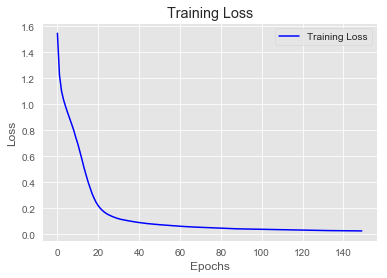

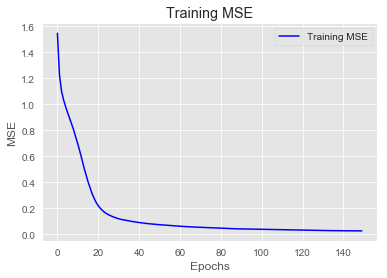

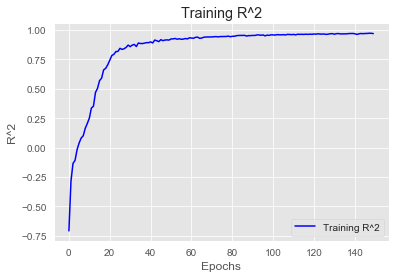

In [70]:
visualize_loss_MSE(baseline_model.history)

In [71]:
baseline_preds_scaled = baseline_model.predict(X_test_Scaled)
baseline_preds = scaler.inverse_transform(baseline_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))

print('RMSE:', rmse)
print('-------------------------')
print(baseline_model.summary())

RMSE: 3.0048039182206567
-------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
None


### Overfit Model

In [72]:
overfit_model = Sequential()

overfit_model.add(layers.Dense(10, activation='relu', input_shape=(n_features, )))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(1, activation='linear'))

overfit_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [73]:
overfit_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
14/14 [==============================] - 0s 786us/step - loss: 1.0838 - mse: 1.0838 - coef_determination: -0.1248
Epoch 2/150
14/14 [==============================] - 0s 851us/step - loss: 0.9822 - mse: 0.9822 - coef_determination: -0.0281
Epoch 3/150
14/14 [==============================] - 0s 785us/step - loss: 0.9399 - mse: 0.9399 - coef_determination: 0.0336
Epoch 4/150
14/14 [==============================] - 0s 782us/step - loss: 0.9012 - mse: 0.9012 - coef_determination: 0.0379
Epoch 5/150
14/14 [==============================] - 0s 784us/step - loss: 0.8657 - mse: 0.8657 - coef_determination: 0.1190
Epoch 6/150
14/14 [==============================] - 0s 784us/step - loss: 0.8285 - mse: 0.8285 - coef_determination: 0.1202
Epoch 7/150
14/14 [==============================] - 0s 717us/step - loss: 0.7891 - mse: 0.7891 - coef_determination: 0.1836
Epoch 8/150
14/14 [==============================] - 0s 709us/step - loss: 0.7428 - mse: 0.7428 - coef_determination: 0.212

14/14 [==============================] - 0s 784us/step - loss: 0.0549 - mse: 0.0549 - coef_determination: 0.9400
Epoch 127/150
14/14 [==============================] - 0s 712us/step - loss: 0.0544 - mse: 0.0544 - coef_determination: 0.9390
Epoch 128/150
14/14 [==============================] - 0s 712us/step - loss: 0.0540 - mse: 0.0540 - coef_determination: 0.9364
Epoch 129/150
14/14 [==============================] - 0s 857us/step - loss: 0.0534 - mse: 0.0534 - coef_determination: 0.9411
Epoch 130/150
14/14 [==============================] - 0s 784us/step - loss: 0.0529 - mse: 0.0529 - coef_determination: 0.9449
Epoch 131/150
14/14 [==============================] - 0s 641us/step - loss: 0.0525 - mse: 0.0525 - coef_determination: 0.9412
Epoch 132/150
14/14 [==============================] - 0s 855us/step - loss: 0.0521 - mse: 0.0521 - coef_determination: 0.9405
Epoch 133/150
14/14 [==============================] - 0s 784us/step - loss: 0.0516 - mse: 0.0516 - coef_determination: 0.939

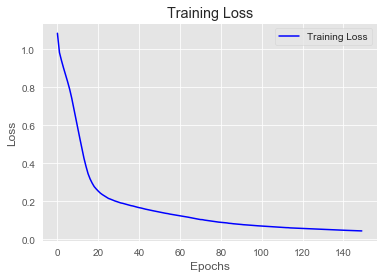

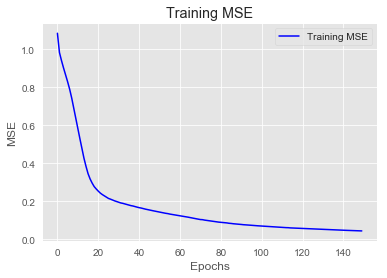

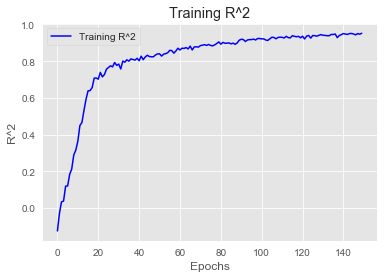

In [74]:
visualize_loss_MSE(overfit_model.history)

In [75]:
overfit_preds_scaled = overfit_model.predict(X_test_Scaled)
overfit_preds = scaler.inverse_transform(overfit_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, overfit_preds))

print('RMSE:', rmse)
print('-------------------------')
print(overfit_model.summary())

RMSE: 3.987558806459101
-------------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                300       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None


### Regularized Model

In [76]:
reg_model = Sequential()

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu', input_shape=(n_features, )))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(1, activation='linear'))

reg_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [77]:
reg_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
14/14 [==============================] - 0s 925us/step - loss: 1.2839 - mse: 0.9994 - coef_determination: -0.0409
Epoch 2/150
14/14 [==============================] - 0s 997us/step - loss: 1.2631 - mse: 0.9794 - coef_determination: -0.0276
Epoch 3/150
14/14 [==============================] - 0s 926us/step - loss: 1.2522 - mse: 0.9692 - coef_determination: -0.0795
Epoch 4/150
14/14 [==============================] - 0s 997us/step - loss: 1.2371 - mse: 0.9549 - coef_determination: 0.0195
Epoch 5/150
14/14 [==============================] - 0s 855us/step - loss: 1.2275 - mse: 0.9460 - coef_determination: -0.0067
Epoch 6/150
14/14 [==============================] - 0s 855us/step - loss: 1.2157 - mse: 0.9347 - coef_determination: 0.0423
Epoch 7/150
14/14 [==============================] - 0s 783us/step - loss: 1.2062 - mse: 0.9259 - coef_determination: 0.0408
Epoch 8/150
14/14 [==============================] - 0s 712us/step - loss: 1.1995 - mse: 0.9197 - coef_determination: -0.

14/14 [==============================] - 0s 712us/step - loss: 0.3228 - mse: 0.0685 - coef_determination: 0.9208
Epoch 67/150
14/14 [==============================] - 0s 712us/step - loss: 0.3212 - mse: 0.0677 - coef_determination: 0.9244
Epoch 68/150
14/14 [==============================] - 0s 712us/step - loss: 0.3187 - mse: 0.0657 - coef_determination: 0.9121
Epoch 69/150
14/14 [==============================] - 0s 712us/step - loss: 0.3174 - mse: 0.0650 - coef_determination: 0.9314
Epoch 70/150
14/14 [==============================] - 0s 784us/step - loss: 0.3155 - mse: 0.0638 - coef_determination: 0.9291
Epoch 71/150
14/14 [==============================] - 0s 787us/step - loss: 0.3126 - mse: 0.0615 - coef_determination: 0.9296
Epoch 72/150
14/14 [==============================] - 0s 712us/step - loss: 0.3127 - mse: 0.0622 - coef_determination: 0.9292
Epoch 73/150
14/14 [==============================] - 0s 869us/step - loss: 0.3115 - mse: 0.0618 - coef_determination: 0.9316
Epoch

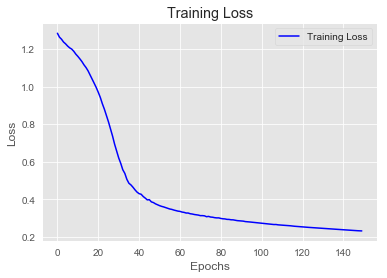

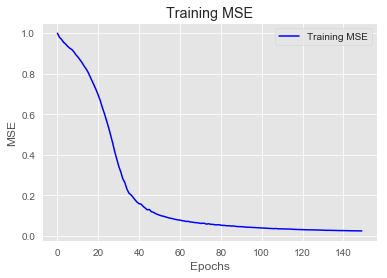

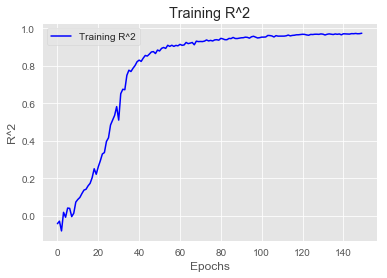

In [78]:
visualize_loss_MSE(reg_model.history)

In [79]:
reg_preds_scaled = reg_model.predict(X_test_Scaled)
reg_preds = scaler.inverse_transform(reg_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, reg_preds))

print('RMSE:', rmse)
print('-------------------------')
print(reg_model.summary())

RMSE: 2.1915848506310605
-------------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                300       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 751
Trainable params: 751
Non-trainable params: 0
_____

### Optimized Model

In [112]:
optimized_model = Sequential()

optimized_model.add(layers.Dense(45,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu', input_shape=(n_features, )))

optimized_model.add(layers.Dense(15,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

optimized_model.add(layers.Dense(3,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

optimized_model.add(layers.Dense(1, activation='linear'))

optimized_model.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['mse', coef_determination])

In [113]:
import time

NAME = 'Optimal Model -relu- Layers(D34L2 & D15L2 & D3L2)'

tensorboard = TensorBoard(log_dir='logs/fit/' + NAME,
                          histogram_freq=1,
                          write_graph=True,
                          write_images=True)

callbacks = [tensorboard]


optimized_model.fit(X_train_Scaled,
                     y_train_Scaled,
                     epochs=150,
                     batch_size=15,
                     callbacks = callbacks)

Epoch 1/150
30/30 [==============================] - 0s 12ms/step - loss: 1.4284 - mse: 1.1224 - coef_determination: -0.3016
Epoch 2/150
30/30 [==============================] - 0s 999us/step - loss: 1.0093 - mse: 0.7097 - coef_determination: 0.1368
Epoch 3/150
30/30 [==============================] - 0s 963us/step - loss: 0.7807 - mse: 0.4871 - coef_determination: 0.4301
Epoch 4/150
30/30 [==============================] - 0s 1ms/step - loss: 0.6014 - mse: 0.3136 - coef_determination: 0.6010
Epoch 5/150
30/30 [==============================] - 0s 997us/step - loss: 0.4835 - mse: 0.2020 - coef_determination: 0.7291
Epoch 6/150
30/30 [==============================] - 0s 972us/step - loss: 0.4232 - mse: 0.1497 - coef_determination: 0.4644
Epoch 7/150
30/30 [==============================] - 0s 964us/step - loss: 0.3773 - mse: 0.1136 - coef_determination: 0.7284
Epoch 8/150
30/30 [==============================] - 0s 1ms/step - loss: 0.3455 - mse: 0.0929 - coef_determination: 0.8833
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.0188 - mse: 0.0036 - coef_determination: 0.9961
Epoch 130/150
30/30 [==============================] - 0s 1ms/step - loss: 0.0183 - mse: 0.0032 - coef_determination: 0.9941
Epoch 131/150
30/30 [==============================] - 0s 1ms/step - loss: 0.0189 - mse: 0.0039 - coef_determination: 0.9947
Epoch 132/150
30/30 [==============================] - 0s 1ms/step - loss: 0.0192 - mse: 0.0042 - coef_determination: 0.9948
Epoch 133/150
30/30 [==============================] - 0s 1ms/step - loss: 0.0182 - mse: 0.0032 - coef_determination: 0.9962
Epoch 134/150
30/30 [==============================] - 0s 1ms/step - loss: 0.0191 - mse: 0.0041 - coef_determination: 0.9948
Epoch 135/150
30/30 [==============================] - 0s 1ms/step - loss: 0.0190 - mse: 0.0041 - coef_determination: 0.9955
Epoch 136/150
30/30 [==============================] - 0s 1ms/step - loss: 0.0178 - mse: 0.0030 - coef_determination: 0.9316
Epoch 137/150


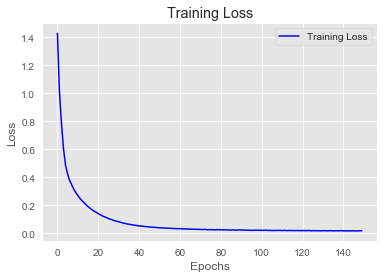

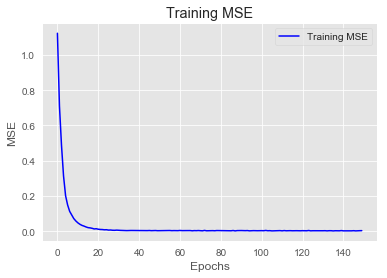

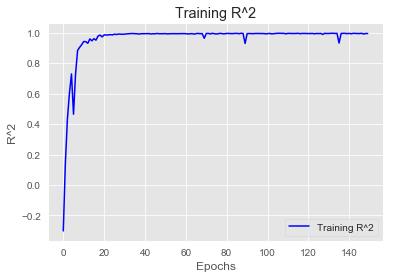

In [114]:
visualize_loss_MSE(optimized_model.history)

In [115]:
op_preds_scaled = optimized_model.predict(X_test_Scaled)
op_preds = scaler.inverse_transform(op_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, op_preds))

print('RMSE:', rmse)
print('-------------------------')
print(optimized_model.summary())

RMSE: 0.6779113963020904
-------------------------
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 45)                1350      
_________________________________________________________________
dense_39 (Dense)             (None, 15)                690       
_________________________________________________________________
dense_40 (Dense)             (None, 3)                 48        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 4         
Total params: 2,092
Trainable params: 2,092
Non-trainable params: 0
_________________________________________________________________
None
